# Basic Classification Example with TensorFlow
This notebook is a companion of A Visual and Interactive Guide to the Basics of Neural Networks.
This is an example of how to do classification on a simple dataset in TensorFlow. Basically, we're building a model to help a friend choose a house to buy. She has given us the table below of houses and whether she likes them or not. 

We're to build a model that takes a house area and number of bathrooms as input, and outputs a prediction of whether she would like the house or not.

Area (sq ft) (x1)	Bathrooms (x2)	Label (y)
2,104	3	Good
1,600	3	Good
2,400	3	Good
1,416	2	Bad
3,000	4	Bad
1,985	4	Good
1,534	3	Bad
1,427	3	Good
1,380	3	Good
1,494	3	Good

We'll start by loading our favorite libraries

In [53]:
%matplotlib inline               
import pandas as pd              # A beautiful library to help us work with data as tables
import numpy as np               # So we can use number matrices. Both pandas and TensorFlow need it. 
import matplotlib.pyplot as plt  # Visualize the things
import tensorflow as tf          # Fire from the gods
import matplotlib

We'll then load the house data CSV. Pandas is an incredible library that gives us great flexibility in dealing with table-like data. We load tables (or csv files, or excel sheets) into a "data frame", and process it however we like. You can think of it as a programatic way to do a lot of the things you previously did with Excel.

In [4]:
url = "https://raw.githubusercontent.com/llSourcell/How_to_use_Tensorflow_for_classification-LIVE/master/data.csv"

In [22]:
dataframe = pd.read_csv(url) # Let's have Pandas load our dataset as a dataframe
dataframe.shape

(47, 5)

In [23]:
dataframe

,index,area,bathrooms,price,sq_price
0,0,2104.0,3.0,399900.0,190.066540
1,1,1600.0,3.0,329900.0,206.187500
2,2,2400.0,3.0,369000.0,153.750000
3,3,1416.0,2.0,232000.0,163.841808
4,4,3000.0,4.0,539900.0,179.966667
5,5,1985.0,4.0,299900.0,151.083123
6,6,1534.0,3.0,314900.0,205.280313
7,7,1427.0,3.0,198999.0,139.452698
8,8,1380.0,3.0,212000.0,153.623188
9,9,1494.0,3.0,242500.0,162.315930


In [25]:
dataframe = dataframe.drop(["index", "price", "sq_price"], axis=1) # Remove columns we don't care about

In [26]:
dataframe.shape

(10, 2)

In [27]:
dataframe = dataframe[0:10] # We'll only use the first 10 rows of the dataset in this example
dataframe # Let's have the notebook show us how the dataframe looks now

,area,bathrooms
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0
5,1985.0,4.0
6,1534.0,3.0
7,1427.0,3.0
8,1380.0,3.0
9,1494.0,3.0


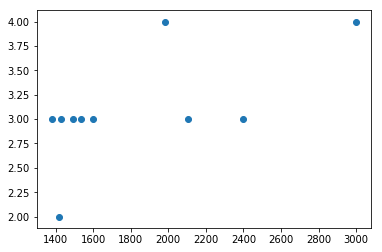

In [54]:
plt.scatter(dataframe['area'], dataframe['bathrooms'])

In [28]:

dataframe.loc[:, ("y1")] = [1, 1, 1, 0, 0, 1, 0, 1, 1, 1] # This is our friend's list of which houses she liked
                                                          # 1 = good, 0 = bad
dataframe.loc[:, ("y2")] = dataframe["y1"] == 0           # y2 is the negation of y1
dataframe.loc[:, ("y2")] = dataframe["y2"].astype(int)    # Turn TRUE/FALSE values into 1/0
# y2 means we don't like a house
# (Yes, it's redundant. But learning to do it this way opens the door to Multiclass classification)
dataframe # How is our dataframe looking now?

,area,bathrooms,y1,y2
0,2104.0,3.0,1,0
1,1600.0,3.0,1,0
2,2400.0,3.0,1,0
3,1416.0,2.0,0,1
4,3000.0,4.0,0,1
5,1985.0,4.0,1,0
6,1534.0,3.0,0,1
7,1427.0,3.0,1,0
8,1380.0,3.0,1,0
9,1494.0,3.0,1,0


Now that we have all our data in the dataframe, we'll need to shape it in matrices to feed it to TensorFlow

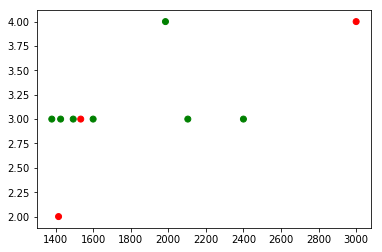

In [61]:
# Setting the choice as positve GREEN and RED negative
colors = ['red','green']
label = dataframe['y1']
plt.scatter(dataframe['area'], dataframe['bathrooms'], c=label, cmap=matplotlib.colors.ListedColormap(colors))

In [60]:
inputX = dataframe.loc[:, ['area', 'bathrooms']].as_matrix()
inputY = dataframe.loc[:, ["y1", "y2"]].as_matrix()

In [31]:
inputX

array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00],
       [  1.98500000e+03,   4.00000000e+00],
       [  1.53400000e+03,   3.00000000e+00],
       [  1.42700000e+03,   3.00000000e+00],
       [  1.38000000e+03,   3.00000000e+00],
       [  1.49400000e+03,   3.00000000e+00]])

In [32]:
inputY

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0]])

Let's prepare some parameters for the training process

In [33]:
# Parameters
learning_rate = 0.000001
training_epochs = 2000
display_step = 50
n_samples = inputY.size

In [34]:
x = tf.placeholder(tf.float32, [None, 2])   # Okay TensorFlow, we'll feed you an array of examples. Each example will
                                            # be an array of two float values (area, and number of bathrooms).
                                            # "None" means we can feed you any number of examples
                                            # Notice we haven't fed it the values yet
            
W = tf.Variable(tf.zeros([2, 2]))           # Maintain a 2 x 2 float matrix for the weights that we'll keep updating 
                                            # through the training process (make them all zero to begin with)
    
b = tf.Variable(tf.zeros([2]))              # Also maintain two bias values

y_values = tf.add(tf.matmul(x, W), b)       # The first step in calculating the prediction would be to multiply
                                            # the inputs matrix by the weights matrix then add the biases
    
y = tf.nn.softmax(y_values)                 # Then we use softmax as an "activation function" that translates the
                                            # numbers outputted by the previous layer into probability form
    
y_ = tf.placeholder(tf.float32, [None,2])   # For training purposes, we'll also feed you a matrix of labels

Let's specify our cost function and use Gradient Descent

In [35]:
# Cost function: Mean squared error
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [40]:
# Initialize variabls and tensorflow session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Performing actual traning

In [37]:
for i in range(training_epochs):  
    sess.run(optimizer, feed_dict={x: inputX, y_: inputY}) # Take a gradient descent step using our inputs and labels

    # That's all! The rest of the cell just outputs debug messages. 
    # Display logs per epoch step
    if (i) % display_step == 0:
        cc = sess.run(cost, feed_dict={x: inputX, y_:inputY})
        print "Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc) #, \"W=", sess.run(W), "b=", sess.run(b)

print "Optimization Finished!"
training_cost = sess.run(cost, feed_dict={x: inputX, y_: inputY})
print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

Training step: 0000 cost= 0.114958666
Training step: 0050 cost= 0.109539941
Training step: 0100 cost= 0.109539866
Training step: 0150 cost= 0.109539807
Training step: 0200 cost= 0.109539732
Training step: 0250 cost= 0.109539673
Training step: 0300 cost= 0.109539606
Training step: 0350 cost= 0.109539531
Training step: 0400 cost= 0.109539464
Training step: 0450 cost= 0.109539405
Training step: 0500 cost= 0.109539315
Training step: 0550 cost= 0.109539248
Training step: 0600 cost= 0.109539196
Training step: 0650 cost= 0.109539129
Training step: 0700 cost= 0.109539054
Training step: 0750 cost= 0.109538987
Training step: 0800 cost= 0.109538913
Training step: 0850 cost= 0.109538853
Training step: 0900 cost= 0.109538779
Training step: 0950 cost= 0.109538712
Training step: 1000 cost= 0.109538652
Training step: 1050 cost= 0.109538577
Training step: 1100 cost= 0.109538510
Training step: 1150 cost= 0.109538436
Training step: 1200 cost= 0.109538361
Training step: 1250 cost= 0.109538302
Training ste

Now the training is done. TensorFlow is now holding on to our trained model (Which is basically just the defined operations, plus the variables W and b that resulted from the training process).

Is a cost value of 0.109537 good or bad? I have no idea. At least it's better than the first cost value of 0.114958666. 

Let's use the model on our dataset to see how it does, though:

In [38]:
sess.run(y, feed_dict={x: inputX })

array([[ 0.71125221,  0.28874779],
       [ 0.66498977,  0.33501023],
       [ 0.73657656,  0.26342347],
       [ 0.64718789,  0.35281211],
       [ 0.78335613,  0.2166439 ],
       [ 0.70069474,  0.29930523],
       [ 0.65866327,  0.34133676],
       [ 0.64828628,  0.35171372],
       [ 0.64368278,  0.35631716],
       [ 0.65480113,  0.3451989 ]], dtype=float32)

So It's guessing they're all good houses. That makes it get 7/10 correct. Not terribly impressive. A model with a hidden layer should do better, I guess.

Btw, this is how I calculated the softmax values in the post:

In [39]:
sess.run(tf.nn.softmax([1., 2.]))

array([ 0.26894143,  0.7310586 ], dtype=float32)